## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)
# Allow multople output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Easy print of code output
def pv(variable):
    if(len(variable)>1): print(variable, ":", eval(variable))

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head(3)
df.tail(3)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0


,user_id,timestamp,group,landing_page,converted
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0
294477,715931,2017-01-16 12:40:24.467417,treatment,new_page,0


b. Use the below cell to find the number of rows in the dataset.

In [3]:
len(df)

294478

c. The number of unique users in the dataset.

In [4]:
df.describe()

total_users = len(df.user_id.value_counts())
print(total_users)

,user_id,converted
count,294478.000000,294478.000000
mean,787974.124733,0.119659
std,91210.823776,0.324563
min,630000.000000,0.000000
25%,709032.250000,0.000000
50%,787933.500000,0.000000
75%,866911.750000,0.000000
max,945999.000000,1.000000


290584


d. The proportion of users converted.

In [62]:
df.converted.value_counts()
converted_users = df.converted.value_counts()[1]/total_users
print("Proportion of users converted : ", converted_users*100)


0    259241
1     35237
Name: converted, dtype: int64

Proportion of users converted :  12.126269856564711


e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
df_tmp = df.query("not (group == 'treatment' and landing_page == 'new_page')")
df_tmp.shape[0]
df_tmp = df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False]
df_tmp.shape[0]


149167

3893

In [7]:
df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].shape[0]

3893

f. Do any of the rows have missing values?

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
# Group treatment must see "new_page"
df_new = df[((df['group'] == 'treatment') & (df['landing_page'] == 'new_page'))]
# Group control must see "old_page"
df_old = df[((df['group'] == 'control') & (df['landing_page'] == 'old_page'))]
df2 = pd.concat([df_old, df_new])
df2.head(3)
df2.tail(3)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


,user_id,timestamp,group,landing_page,converted
294468,643562,2017-01-02 19:20:05.460595,treatment,new_page,0
294472,822004,2017-01-04 03:36:46.071379,treatment,new_page,0
294477,715931,2017-01-16 12:40:24.467417,treatment,new_page,0


In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
total_users = len(df2.user_id.value_counts())
print("unique user_ids in df2 :", total_users)

unique user_ids in df2 : 290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
df2.user_id.value_counts().max()
df2.user_id.value_counts().head(1)

2

773192    2
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [13]:
df2.loc[df2['user_id'] == 773192] 

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
df2 = df2.drop([2893])

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
total_users = len(df2.user_id.value_counts())
total_converted = len(df2[df2['converted'] == 1])
print("unique user_ids in df2 :", total_users)
print("unique user_ids converted in df2 :", total_converted)
p_convert = total_converted / total_users
print("probability of an individual converting regardless of the page they receive", p_convert)

unique user_ids in df2 : 290584
unique user_ids converted in df2 : 34753
probability of an individual converting regardless of the page they receive 0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
df_control = df2[df2['group'] == 'control']
control_users = len(df_control)
print("user in control group", control_users)
control_converted = len(df_control[df_control['converted'] == 1])
print("Converted in control group", control_converted)
print("Given that an individual was in the control group, what is the probability they converted?", control_converted / control_users)

user in control group 145274
Converted in control group 17489
Given that an individual was in the control group, what is the probability they converted? 0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
df_treatment= df2[df2['group'] == 'treatment']
treatment_users = len(df_treatment)
print("user in treatment group", treatment_users)
treatment_converted = len(df_treatment[df_treatment['converted'] == 1])
print("Converted in treatment group", treatment_converted)
print("Given that an individual was in the treatment group, what is the probability they converted?", treatment_converted / treatment_users)

user in treatment group 145310
Converted in treatment group 17264
Given that an individual was in the treatment group, what is the probability they converted? 0.11880806551510564


d. What is the probability that an individual received the new page?

In [18]:
df_new_page= df2[df2['landing_page'] == 'new_page']
new_pages_users = len(df_new_page)
print("user in treatment group", treatment_users)
print("user in new_pages ", new_pages_users)
print(" probability that an individual received the new page", treatment_users / total_users )

user in treatment group 145310
user in new_pages  145310
 probability that an individual received the new page 0.5000619442226688


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**There is more conversion in the control group, so the new page is not good, looking only at probabilities of the A/B test.
But we have to look more carefully to see if it's really true.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Null hypothesis :** The conversion rate of the new page is lower or the same as the old page.

**Alternative hypothesis :** The conversion rate of the new page is above the one of the old page.

$$H_0: p_{new} <= p_{old} $$
$$H_1: p_{new} > p_{old} $$

or :

$$H_0: p_{new} - p_{old}<= 0 $$
$$H_1: p_{new} - p_{old}> 0 $$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [39]:
print("probability of an individual converting regardless of the page they receive", p_convert)

probability of an individual converting regardless of the page they receive 0.11959708724499628


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [20]:
print("probability of an individual converting regardless of the page they receive", p_convert)

probability of an individual converting regardless of the page they receive 0.11959708724499628


c. What is $n_{new}$?

In [21]:
print("user in treatment group", treatment_users)

user in treatment group 145310


d. What is $n_{old}$?

In [22]:
print("user in control group", control_users)

user in control group 145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [23]:
new_page_converted = np.random.choice(a=2, size=treatment_users, p=[1-p_convert, p_convert])
new_page_converted
len(new_page_converted)

array([0, 0, 0, ..., 1, 0, 1])

145310

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [24]:
old_page_converted = np.random.choice(a=2, size=control_users, p=[1-p_convert, p_convert])
old_page_converted
len(old_page_converted)

array([0, 1, 0, ..., 0, 0, 0])

145274

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [25]:
p_new = new_page_converted.mean()
pv("p_new")
p_old = old_page_converted.mean()
pv("p_old")
pv("p_new - p_old")

p_new : 0.12052164338311197
p_old : 0.11993887412751077
p_new - p_old : 0.0005827692556012037


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [26]:
p_diffs = []
for _ in range(10_000):
    old_page_converted = np.random.choice(a=2, size=control_users, p=[1-p_convert, p_convert])
    new_page_converted = np.random.choice(a=2, size=treatment_users, p=[1-p_convert, p_convert])
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

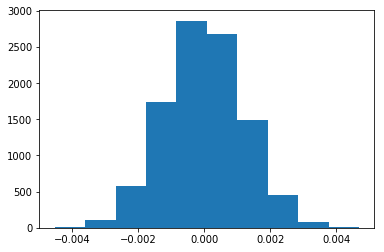

In [27]:
plt.hist(p_diffs);


j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

obs_diff : -0.0015782389853555567
pvalue : 0.9065
The null is statistically significant.


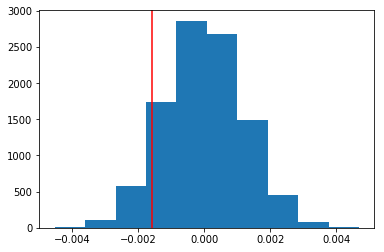

In [28]:
obs_diff = (treatment_converted / treatment_users) - (control_converted / control_users)
pv("obs_diff")
p_diffs = np.array(p_diffs)
pvalue = (p_diffs > obs_diff).mean() # proportion of times the null_vals is above the observation.
pv("pvalue")
if pvalue > 0.05:
    print("The null is statistically significant.")
else:
    print("We reject the null hypothesis : we suggest to put the experiment in production")
plt.hist(p_diffs);
# plot line for observed statistic
plt.axvline(x=obs_diff, color='r');
plt.show();

### Try with sample with replacement
I'd like to check with the method viewed in the course, to see if the conclusion was the same.

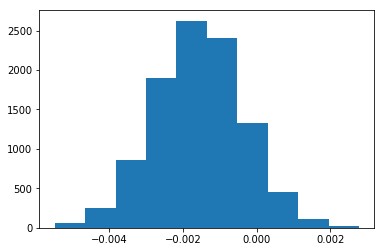

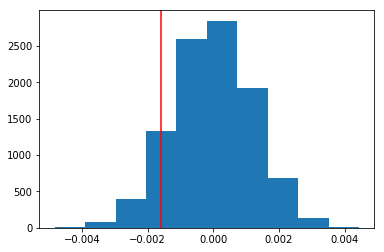

pvalue : 0.9002
The null is statistically significant.


In [29]:
# Create sampling distribution for difference in completion rates
# with boostrapping
diffs = []
size = len(df2)
for _ in range(10_000):
    b_samp = df2.sample(size, replace=True)
    control_df = b_samp.query('group == "control"')
    experiment_df = b_samp.query('group == "treatment"')
    control_ctr = len(control_df.query("converted == 1")) / len(control_df)
    experiment_ctr = len(experiment_df.query("converted == 1")) / len(experiment_df)
    diffs.append(experiment_ctr - control_ctr)
# convert to numpy array
diffs = np.array(diffs)
# plot distribution
_ = plt.hist(diffs);
plt.show();
# create distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), len(diffs) )
# plot null distribution
_ = plt.hist(null_vals);
# plot line for observed statistic
plt.axvline(x=obs_diff, color='r');
plt.show();
# compute p value
pvalue = (null_vals > obs_diff).mean() # proportion of times the null_vals is above the observation.
pv("pvalue")
alpha = 0.05
if pvalue > alpha:
    print("The null is statistically significant.")
else:
    print("We reject the null hypothesis : we suggest to put the experiment in production")

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**In part J we compute what we called a p-value. It represent the probability of randomly find the result we observed. We choose to consider that if the p-value is above 5% we consider the result we observed as not significant.
Here we are at 90% so the experiment improve nothing at all. The old pages have higher or equal converted rate than new pages in 90% probability.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [30]:
import statsmodels.api as sm

convert_old = control_converted
convert_new = treatment_converted
n_old = control_users
n_new = treatment_users

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [31]:
z_score, p_value = sm.stats.proportions_ztest(count=[convert_new, convert_old], nobs=[n_new, n_old], alternative = 'larger')
pv("z_score")
pv("p_value")

z_score : -1.3109241984234394
p_value : 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The p-value is almost the same as we computed before.
The z-score represent how far we are from the mean.
The z-score is where we are on the axis of a normal distribution. Using a Normal Distribution Table we find the p-value, that represent the area under the curve, saying that we have a probability of 90% to observe the difference in mean by chance. So that confirm the null hypothesis.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**It's a logistic regression as we need to predict distinct value.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [32]:
df['intercept'] = 1
df['ab_page'] = pd.get_dummies(df['group'])['treatment']
df.head(3)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [43]:
mod = sm.Logit(df.converted, df[['intercept', 'ab_page']])
res = mod.fit()

Optimization terminated successfully.
         Current function value: 0.366243
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [44]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               294478
Model:                          Logit   Df Residuals:                   294476
Method:                           MLE   Df Model:                            1
Date:                Tue, 09 Apr 2019   Pseudo R-squ.:               7.093e-06
Time:                        14:52:00   Log-Likelihood:            -1.0785e+05
converged:                       True   LL-Null:                   -1.0785e+05
                                        LLR p-value:                    0.2161
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9887      0.008   -248.297      0.000      -2.004      -1.973
ab_page       -0.0140      0.011     -1.237      0.216      -0.036       0.008
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**This p-value represent whenever the ab_page is usefull to predict if someone convert.**

Our hypothesis was :
$$H_0: p_{new} <= p_{old} $$
$$H_1: p_{new} > p_{old} $$

For Logit, the hypothesis are :

$H_0$ : There is no relationship between ab_page and converted

$H_1$ : There exist a relationship between ab_page and converted

So it is not the same, we were looking if ab_page increase the convertion, not if they are related.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Many things can influence the convertion rate :**
- Was the test done long enought ? On enought persons ?
- Was there external event that can influence it ? For exemple holliday may, or may not, be the period where people want to begin a new course. When using time series data like we do here it's seem important to view the convertion rate versus time.
- Weekday versus weekend could also have an influence.
- The environnement where poeple live may also be important : the country, the weather, strikes, ...

Adding additionel terms is a good idea if the seems to have an influence. But we have to be carreful to do not fall into multi-colinearity.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [40]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')


,country,timestamp,group,landing_page,converted
user_id,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1


In [42]:
### Create the necessary dummy variables
df_new = df_new.join(pd.get_dummies(df_new['country'], prefix="country"))
df_new.head(3)

,country,timestamp,group,landing_page,converted,country_CA,country_UK,country_US
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,0,1,0


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [46]:
### Fit Your Linear Model And Obtain the Results
df_new['intercept'] = 1
df_new['ab_page'] = pd.get_dummies(df_new['group'])['treatment']
df_new.head(3)
mod = sm.Logit(df_new.converted, df_new[['intercept', 'ab_page', 'country_CA', 'country_UK']])
res = mod.fit()
res.summary()

,country,timestamp,group,landing_page,converted,country_CA,country_UK,country_US,intercept,ab_page
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,0,0,1,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,0,1,0,1,1


Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Tue, 09 Apr 2019   Pseudo R-squ.:               2.323e-05
Time:                        14:54:52   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
country_CA    -0.0408      0.027     -1.516      0.130      -0.093       0.012
country_UK     0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

In [48]:
np.exp(res.params)
1/np.exp(res.params)

intercept     0.136795
ab_page       0.985168
country_CA    0.960062
country_UK    1.009932
dtype: float64

intercept     7.310207
ab_page       1.015056
country_CA    1.041599
country_UK    0.990165
dtype: float64

I did not saw clear relationship between country and convertion rate

In [58]:
print("Analyzing World convertion rate :")
pv("df_new['converted'].mean()")
pv("df_new.query(\"group == 'control'\")['converted'].mean()")
pv("df_new.query(\"group == 'treatment'\")['converted'].mean()")
print("\nAnalyzing US convertion rate :")
pv("df_new.query(\"country == 'US'\")['converted'].mean()")
pv("df_new.query(\"country == 'US' and group == 'control'\")['converted'].mean()")
pv("df_new.query(\"country == 'US' and group == 'treatment'\")['converted'].mean()")
print("\nAnalyzing UK convertion rate :")
pv("df_new.query(\"country == 'UK'\")['converted'].mean()")
pv("df_new.query(\"country == 'UK' and group == 'control'\")['converted'].mean()")
pv("df_new.query(\"country == 'UK' and group == 'treatment'\")['converted'].mean()")
print("\nAnalyzing CA convertion rate :")
pv("df_new.query(\"country == 'CA'\")['converted'].mean()")
pv("df_new.query(\"country == 'CA' and group == 'control'\")['converted'].mean()")
pv("df_new.query(\"country == 'CA' and group == 'treatment'\")['converted'].mean()")
print("\nCountry proportion")
df_new.country.value_counts()

Analyzing World convertion rate :
df_new['converted'].mean() : 0.11959708724499628
df_new.query("group == 'control'")['converted'].mean() : 0.1203863045004612
df_new.query("group == 'treatment'")['converted'].mean() : 0.11880806551510564

Analyzing US convertion rate :
df_new.query("country == 'US'")['converted'].mean() : 0.1195468006423762
df_new.query("country == 'US' and group == 'control'")['converted'].mean() : 0.12062998938220143
df_new.query("country == 'US' and group == 'treatment'")['converted'].mean() : 0.11846559963887227

Analyzing UK convertion rate :
df_new.query("country == 'UK'")['converted'].mean() : 0.12059448568984076
df_new.query("country == 'UK' and group == 'control'")['converted'].mean() : 0.12002200220022002
df_new.query("country == 'UK' and group == 'treatment'")['converted'].mean() : 0.1211709965102753

Analyzing CA convertion rate :
df_new.query("country == 'CA'")['converted'].mean() : 0.11531829781364232
df_new.query("country == 'CA' and group == 'control'")

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

Still no relationship, convertion rate is always arround 12%.

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.

In [66]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb', '--to', 'pdf'])

0